<a href="https://colab.research.google.com/github/salsaadityani/k-means-clustering/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from google.colab import drive
import os

%matplotlib inline

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/salju')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PREPROCESSING

In [ ]:
#Read Data
df = pd.read_csv('salju_train.csv')
df.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

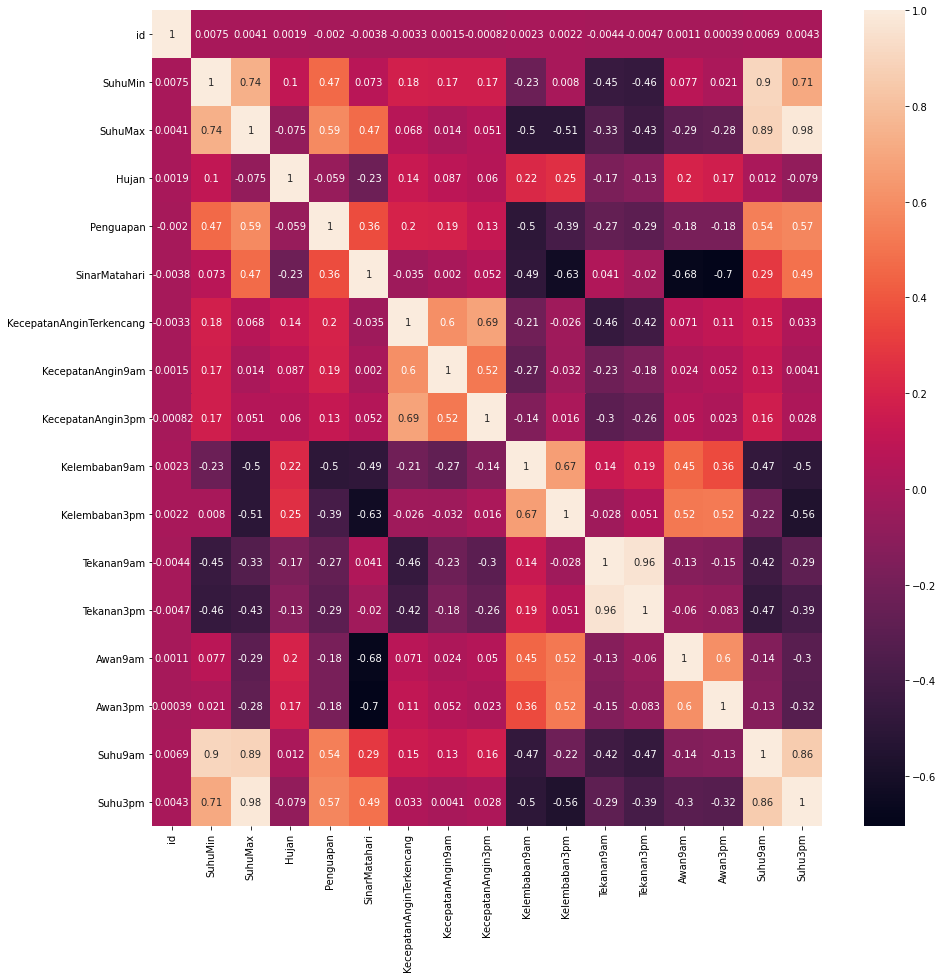

In [ ]:
#Mencari atribut yang berkorelasi dengan heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,109095.0,54548.000000,31493.158146,1.0,27274.5,54548.0,81821.5,109095.0
SuhuMin,107973.0,12.196183,6.389419,-8.5,7.6,12.0,16.8,33.9
SuhuMax,108166.0,23.214819,7.106596,-4.8,17.9,22.6,28.2,47.3
Hujan,106664.0,2.385005,8.588155,0.0,0.0,0.0,0.8,371.0
Penguapan,62071.0,5.462440,4.201638,0.0,2.6,4.8,7.4,145.0
SinarMatahari,56716.0,7.599527,3.789042,0.0,4.8,8.4,10.6,14.3
KecepatanAnginTerkencang,101399.0,40.032002,13.617554,7.0,31.0,39.0,48.0,135.0
KecepatanAngin9am,107742.0,14.052115,8.926092,0.0,7.0,13.0,19.0,130.0
KecepatanAngin3pm,106792.0,18.677579,8.830199,0.0,13.0,19.0,24.0,87.0
Kelembaban9am,107093.0,68.895577,18.995528,0.0,57.0,70.0,83.0,100.0


In [ ]:
#Check Missing Value
missval = df.isnull().sum().sort_values(ascending=False)
print(missval)

SinarMatahari               52379
Penguapan                   47024
Awan3pm                     44471
Awan9am                     41844
Tekanan9am                  11327
Tekanan3pm                  11308
ArahAngin9am                 7923
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
Kelembaban3pm                3374
ArahAngin3pm                 3197
Suhu3pm                      2698
Hujan                        2431
BersaljuBesok                2431
BersaljuHariIni              2431
KecepatanAngin3pm            2303
Kelembaban9am                2002
KecepatanAngin9am            1353
Suhu9am                      1340
SuhuMin                      1122
SuhuMax                       929
KodeLokasi                      0
Tanggal                         0
id                              0
dtype: int64


In [ ]:
#Drop Missing Value
df = df.dropna(how='any')
df.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

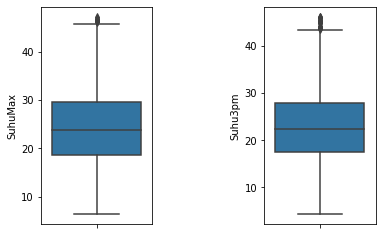

In [ ]:
#check outlier
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["SuhuMax"], ax=axes[0])
sns.boxplot(y=df["Suhu3pm"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
#Memilih 2 kolom yang memiliki korelasi tinggi
kolom = ['SuhuMax', 'Suhu3pm']
new_df = df[kolom]
new_df.head()

,SuhuMax,Suhu3pm
3,24.5,23.2
4,20.3,18.1
5,21.8,21.1
6,18.7,18.3
8,35.3,34.9


In [ ]:
#menangani outlier atribut SuhuMax
while True:
  q1, q3 = np.percentile(new_df['SuhuMax'],[25,75])
  iq = q3 - q1
  lower = q1 - (1.5 * iq)
  upper = q3 + (1.5 * iq)
  outlierr = new_df[(new_df['SuhuMax'] < (lower)) | (new_df['SuhuMax'] > (upper))]
  print('Jumlah Outlier',outlierr.shape[0])

  idx = outlierr.index
  new_df.drop(idx, inplace=True) #drop outlier
  if (outlierr.shape[0] <= 0):
    break

new_df['SuhuMax'].describe()

Jumlah Outlier 8
Jumlah Outlier 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    42403.000000
mean        24.188968
std          6.948942
min          6.300000
25%         18.700000
50%         23.900000
75%         29.600000
max         45.800000
Name: SuhuMax, dtype: float64

In [ ]:
#menangani outlier Suhu3pm
while True:
  qq1, qq3 = np.percentile(new_df['Suhu3pm'],[25,75])
  iqq = qq3 - qq1
  lowerr = qq1 - (1.5 * iqq)
  upperr = qq3 + (1.5 * iqq)
  outlierrr = new_df[(new_df['Suhu3pm'] < (lowerr)) | (new_df['Suhu3pm'] > (upperr))]
  print('Jumlah Outlier',outlierrr.shape[0])

  idxx = outlierrr.index
  new_df.drop(idxx, inplace=True) #drop outlier
  if (outlierrr.shape[0] <= 0):
    break

new_df['Suhu3pm'].describe()

Jumlah Outlier 5
Jumlah Outlier 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    42398.000000
mean        22.675574
std          6.808708
min          4.300000
25%         17.400000
50%         22.400000
75%         27.800000
max         43.300000
Name: Suhu3pm, dtype: float64

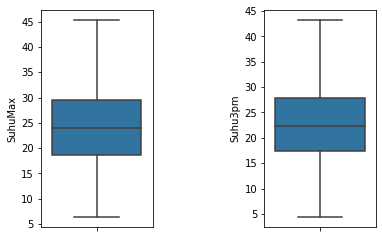

In [ ]:
#check outlier lagi
f, axes = plt.subplots(1, 2)
sns.boxplot(y=new_df["SuhuMax"], ax=axes[0])
sns.boxplot(y=new_df["Suhu3pm"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
#normalisasi data
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
new_df = minmax.fit_transform(new_df)
new_df = pd.DataFrame(new_df, columns=['SuhuMax','Suhu3pm'])
new_df.head()

elbow = pd.DataFrame(new_df, columns=['SuhuMax','Suhu3pm'])

<function matplotlib.pyplot.show>

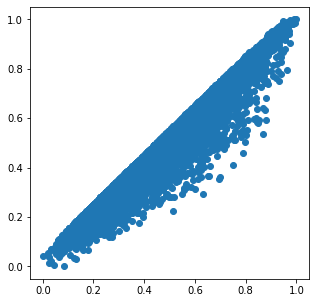

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'])
plt.show

In [ ]:
new_df.to_csv('dataset.csv', index=False)

CLUSTERING

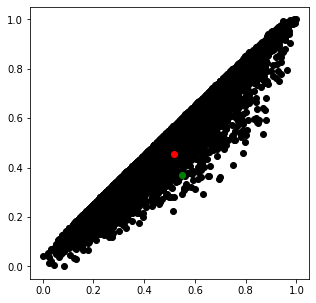

In [ ]:
#mencari centroid
import random

k = 2
centroids = {
    i + 1 : [random.choices(new_df['SuhuMax']),random.choices(new_df['Suhu3pm'])]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color='k')
colmap = {1:'r', 2:'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [ ]:
def jarak(new_df, centroids):
    for i in centroids.keys():
        #euclidean distance
        new_df['distance_from_{}'.format(i)] = (
            np.sqrt((new_df['SuhuMax'] - centroids[i][0]) ** 2 + (new_df['Suhu3pm'] - centroids[i][1]) ** 2)
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    new_df['closest'] = new_df.loc[:, centroid_distance_cols].idxmin(axis=1)
    new_df['closest'] = new_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    new_df['color'] = new_df['closest'].map(lambda x: colmap[x])
    return new_df

new_df = jarak(new_df, centroids)
new_df.head()

,SuhuMax,Suhu3pm,distance_from_1,distance_from_2,closest,color
0,0.465473,0.484615,0.061898,0.140896,1,r
1,0.358056,0.353846,0.189635,0.192654,1,r
2,0.396419,0.430769,0.124912,0.164395,1,r
3,0.317136,0.358974,0.223211,0.233089,1,r
4,0.741688,0.784615,0.398644,0.455208,1,r


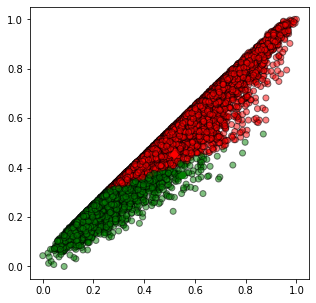

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color=new_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

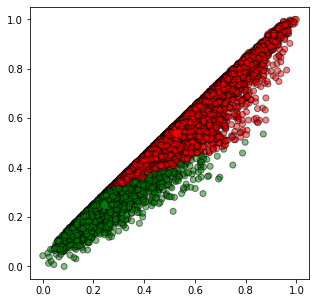

In [ ]:
# Update Centroid

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(new_df[new_df['closest'] == i]['SuhuMax'])
        centroids[i][1] = np.mean(new_df[new_df['closest'] == i]['Suhu3pm'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color=new_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

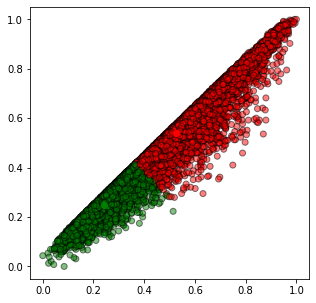

In [ ]:
#Mengulang perhitungan jarak

new_df = jarak(new_df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color=new_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

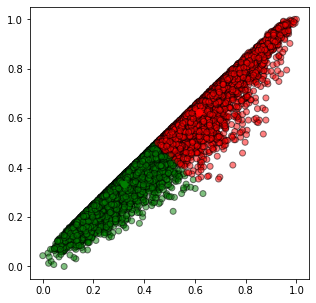

In [ ]:
# Lanjutkan sampai data tiap klaster terpusat

while True:
    terdekat = new_df['closest'].copy(deep=True)
    centroids = update(centroids)
    new_df = jarak(new_df, centroids)
    if terdekat.equals(new_df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color=new_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [ ]:
#test

#from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters=2)
#kmeans.fit(new_df)

In [ ]:
#labels = kmeans.predict(new_df)
#centroids = kmeans.cluster_centers_

In [ ]:
#fig = plt.figure(figsize=(5, 5))

#colors = map(lambda x: colmap[x+1], labels)
#colors1 = list(colors)
#plt.scatter(new_df['SuhuMax'], new_df['Suhu3pm'], color=colors1, alpha=0.5, edgecolor='k')
#for idx, centroid in enumerate(centroids):
#  plt.scatter(*centroid, color=colmap[idx+1])

#plt.show()

EVALUASI

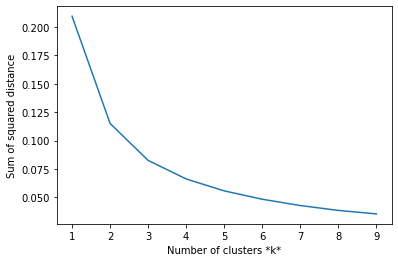

In [ ]:
from sklearn.cluster import KMeans #hanya untuk elbow method
from scipy.spatial.distance import cdist

# sse = []
# for i in range(1, 10):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
#     kmeans.fit(df[kolom])
#     sse.append(kmeans.inertia_)
# plt.plot(range(1,10), sse, 'bx-')
# plt.xlabel('k')
# plt.ylabel('sse')
# plt.title('Elbow Method')
# fig = plt.figure(figsize=(5, 5))
# plt.show
sse = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(elbow)
    #sse.append(km.inertia_)
    sse.append(sum(np.min(cdist(elbow, km.cluster_centers_, 'euclidean'), axis=1)) / elbow.shape[0])

# Plot sse against k
plt.plot(range(1,10), sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

In [ ]:
print('k=1', sse[0])
print('k=2', sse[1])
print('k=3', sse[2])
print('k=4', sse[3])
print('k=5', sse[4])

k=1 0.20944340657946814
k=2 0.11509643167575621
k=3 0.08257575932866718
k=4 0.06624722592886641
k=5 0.05577450172455154
